# 통합 데이터 분석 (Comprehensive Data Analysis)

이 노트북은 다음 데이터셋들에 대한 포괄적인 분석을 제공합니다:

1. **농넷_시장별_사과가격.csv** - 도매시장 사과 가격 데이터
2. **초창패개발_데이터_판매데이터.csv** - 판매 거래 데이터
3. **초창패개발_데이터_판매량분석.csv** - 업체별 일자별 판매량 분석
4. **초창패개발_데이터_평균출고소요일.csv** - 업체별 평균 출고 소요 시간
5. **초창패개발_데이터_CS데이터.csv** - 고객 서비스(CS) 상세 데이터
6. **초창패개발_데이터_CS비율분석.csv** - 업체별 일자별 CS 비율

## 목차
1. 데이터 로드 및 전처리
2. 농넷 시장별 사과가격 분석
3. 판매 데이터 분석
4. 판매량 분석
5. 출고 소요일 분석
6. CS 데이터 분석
7. CS 비율 분석
8. 통합 인사이트 및 결론

In [ ]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Apple SD Gothic Neo'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 스타일 설정
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)

# Pandas 표시 옵션
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

print("라이브러리 로드 완료!")

라이브러리 로드 완료!


---
# 1. 데이터 로드 및 전처리

In [2]:
# 데이터 파일 경로 설정
data_dir = Path('../data/raw')

# 모든 CSV 파일 로드
print("=" * 80)
print("데이터 파일 로드 중...")
print("=" * 80)

# 1. 농넷 시장별 사과가격
df_apple_price = pd.read_csv(data_dir / '농넷_시장별_사과가격.csv', encoding='utf-8-sig')
print(f"✓ 농넷_시장별_사과가격.csv: {len(df_apple_price)} rows")

# 2. 판매 데이터
df_sales = pd.read_csv(data_dir / '초창패개발_데이터_판매데이터.csv', encoding='utf-8-sig')
print(f"✓ 초창패개발_데이터_판매데이터.csv: {len(df_sales)} rows")

# 3. 판매량 분석
df_sales_volume = pd.read_csv(data_dir / '초창패개발_데이터_판매량분석.csv', encoding='utf-8-sig')
print(f"✓ 초창패개발_데이터_판매량분석.csv: {len(df_sales_volume)} rows")

# 4. 평균 출고 소요일
df_delivery_days = pd.read_csv(data_dir / '초창패개발_데이터_평균출고소요일.csv', encoding='utf-8-sig')
print(f"✓ 초창패개발_데이터_평균출고소요일.csv: {len(df_delivery_days)} rows")

# 5. CS 데이터
df_cs = pd.read_csv(data_dir / '초창패개발_데이터_CS데이터.csv', encoding='utf-8-sig')
print(f"✓ 초창패개발_데이터_CS데이터.csv: {len(df_cs)} rows")

# 6. CS 비율 분석
df_cs_ratio = pd.read_csv(data_dir / '초창패개발_데이터_CS비율분석.csv', encoding='utf-8-sig')
print(f"✓ 초창패개발_데이터_CS비율분석.csv: {len(df_cs_ratio)} rows")

print("\n모든 데이터 로드 완료!")

데이터 파일 로드 중...
✓ 농넷_시장별_사과가격.csv: 10736 rows
✓ 초창패개발_데이터_판매데이터.csv: 17312 rows
✓ 초창패개발_데이터_판매량분석.csv: 33 rows
✓ 초창패개발_데이터_평균출고소요일.csv: 4 rows
✓ 초창패개발_데이터_CS데이터.csv: 38 rows
✓ 초창패개발_데이터_CS비율분석.csv: 33 rows

모든 데이터 로드 완료!


---
# 2. 농넷 시장별 사과가격 분석

## 2.1 기본 정보 확인

In [3]:
print("=" * 80)
print("농넷 시장별 사과가격 데이터 - 기본 정보")
print("=" * 80)
print(f"\n데이터 형태: {df_apple_price.shape}")
print(f"\n컬럼 목록:")
for col in df_apple_price.columns:
    print(f"  - {col}")

print("\n첫 10개 데이터:")
df_apple_price.head(10)

농넷 시장별 사과가격 데이터 - 기본 정보

데이터 형태: (10736, 12)

컬럼 목록:
  - DATE
  - 거래단위
  - 평균가격
  - 총거래물량
  - 총거래금액
  - 도매시장
  - 도매법인
  - 품목
  - 품종
  - 산지-광역시도
  - 산지-시군구
  - 등급

첫 10개 데이터:


,DATE,거래단위,평균가격,총거래물량,총거래금액,도매시장,도매법인,품목,품종,산지-광역시도,산지-시군구,등급
0,2025-07-14,20kg상자,"117,047","7,960","46,584,800",안동도매시장,안동청과,사과,미얀마,경북,청송군,상
1,2025-07-14,20kg상자,"29,193","7,600","11,093,500",안동도매시장,안동청과,사과,썸머킹,경북,의성군,보통
2,2025-07-14,20kg상자,"123,129","7,160","44,080,300",안동도매시장,안동청과,사과,미얀마,경북,안동시,상
3,2025-07-14,20kg상자,"72,684","6,180","22,459,500",안동도매시장,안동청과,사과,미얀마,경북,청송군,보통
4,2025-07-14,20kg상자,"88,837","5,840","25,940,300",안동도매시장,안동청과,사과,미얀마,경북,안동시,보통
5,2025-07-14,20kg상자,"31,422","5,820","9,143,900",안동도매시장,안동농협(공),사과,미얀마,경북,안동시,보통
6,2025-07-14,20kg상자,"103,996","5,340","27,766,900",안동도매시장,안동청과,사과,미얀마,경북,의성군,상
7,2025-07-14,20kg상자,"86,340","4,620","19,944,600",안동도매시장,안동농협(공),사과,미얀마,경북,안동시,.
8,2025-07-14,20kg상자,"63,597","3,960","12,592,200",안동도매시장,안동청과,사과,미얀마,경북,의성군,보통
9,2025-07-14,20kg상자,"78,761","3,900","15,358,400",안동도매시장,안동청과,사과,썸머킹,경북,포항시,상


In [4]:
# 데이터 타입 및 결측치 확인
print("=" * 80)
print("데이터 타입 및 결측치")
print("=" * 80)
df_apple_price.info()

데이터 타입 및 결측치
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10736 entries, 0 to 10735
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     10736 non-null  object
 1   거래단위     10736 non-null  object
 2   평균가격     10736 non-null  object
 3   총거래물량    10736 non-null  object
 4   총거래금액    10736 non-null  object
 5   도매시장     10736 non-null  object
 6   도매법인     10736 non-null  object
 7   품목       10736 non-null  object
 8   품종       10736 non-null  object
 9   산지-광역시도  10736 non-null  object
 10  산지-시군구   10736 non-null  object
 11  등급       10736 non-null  object
dtypes: object(12)
memory usage: 1006.6+ KB


## 2.2 데이터 전처리

In [5]:
# 날짜 컬럼 변환
df_apple_price['DATE'] = pd.to_datetime(df_apple_price['DATE'])

# 숫자 컬럼에서 콤마 제거 및 숫자 변환
numeric_cols = ['평균가격', '총거래물량', '총거래금액']
for col in numeric_cols:
    if col in df_apple_price.columns:
        df_apple_price[col] = df_apple_price[col].astype(str).str.replace(',', '').astype(float)

print("데이터 전처리 완료!")
df_apple_price.head()

데이터 전처리 완료!


,DATE,거래단위,평균가격,총거래물량,총거래금액,도매시장,도매법인,품목,품종,산지-광역시도,산지-시군구,등급
0,2025-07-14,20kg상자,117047.0,7960.0,46584800.0,안동도매시장,안동청과,사과,미얀마,경북,청송군,상
1,2025-07-14,20kg상자,29193.0,7600.0,11093500.0,안동도매시장,안동청과,사과,썸머킹,경북,의성군,보통
2,2025-07-14,20kg상자,123129.0,7160.0,44080300.0,안동도매시장,안동청과,사과,미얀마,경북,안동시,상
3,2025-07-14,20kg상자,72684.0,6180.0,22459500.0,안동도매시장,안동청과,사과,미얀마,경북,청송군,보통
4,2025-07-14,20kg상자,88837.0,5840.0,25940300.0,안동도매시장,안동청과,사과,미얀마,경북,안동시,보통


## 2.3 기본 통계량

In [6]:
print("=" * 80)
print("수치형 변수 기본 통계량")
print("=" * 80)
df_apple_price[numeric_cols].describe()

수치형 변수 기본 통계량


,평균가격,총거래물량,총거래금액
count,10736.000000,10736.000000,1.073600e+04
mean,95969.430980,995.661326,4.333711e+06
std,36735.180254,2076.407056,8.760295e+06
min,2200.000000,20.000000,2.200000e+03
25%,68763.250000,100.000000,4.618000e+05
50%,101755.000000,320.000000,1.464350e+06
75%,123578.250000,880.000000,4.136575e+06
max,290000.000000,30780.000000,1.566288e+08


## 2.4 결측치 분석

In [7]:
# 결측치 분석
missing_apple = pd.DataFrame({
    '결측치 개수': df_apple_price.isnull().sum(),
    '결측치 비율(%)': (df_apple_price.isnull().sum() / len(df_apple_price) * 100).round(2)
})

print("=" * 80)
print("결측치 분석")
print("=" * 80)
print(missing_apple[missing_apple['결측치 개수'] > 0])

결측치 분석
Empty DataFrame
Columns: [결측치 개수, 결측치 비율(%)]
Index: []


## 2.5 시장별, 품종별, 등급별 분석

In [8]:
# 도매시장별 거래량
print("=" * 80)
print("도매시장별 거래 현황")
print("=" * 80)
market_stats = df_apple_price.groupby('도매시장').agg({
    '총거래물량': 'sum',
    '총거래금액': 'sum',
    '평균가격': 'mean'
}).round(0)
market_stats.columns = ['총 거래물량', '총 거래금액', '평균 가격']
print(market_stats.sort_values('총 거래물량', ascending=False))

도매시장별 거래 현황
            총 거래물량        총 거래금액    평균 가격
도매시장                                     
안동도매시장  10689420.0  4.652673e+10  95969.0


In [9]:
# 품종별 거래량
print("\n" + "=" * 80)
print("품종별 거래 현황")
print("=" * 80)
variety_stats = df_apple_price.groupby('품종').agg({
    '총거래물량': 'sum',
    '총거래금액': 'sum',
    '평균가격': 'mean'
}).round(0)
variety_stats.columns = ['총 거래물량', '총 거래금액', '평균 가격']
print(variety_stats.sort_values('총 거래물량', ascending=False).head(10))


품종별 거래 현황
           총 거래물량        총 거래금액     평균 가격
품종                                       
미얀마     9569140.0  4.255555e+10  100861.0
후지       553940.0  1.692050e+09   82713.0
기타사과     218580.0  9.774546e+08   93100.0
썸머킹      105900.0  4.136537e+08   93564.0
썸머프린스     48880.0  2.121676e+08   88564.0
시나노골드     44080.0  1.162032e+08   48934.0
미야비       40320.0  1.618519e+08   96386.0
미시마       37880.0  1.316808e+08   83479.0
후지후브락스    33100.0  1.552211e+08   97928.0
아오리       12160.0  3.661430e+07   71404.0


In [10]:
# 등급별 가격 분석
print("\n" + "=" * 80)
print("등급별 가격 현황")
print("=" * 80)
grade_stats = df_apple_price.groupby('등급').agg({
    '평균가격': ['mean', 'median', 'min', 'max'],
    '총거래물량': 'sum'
}).round(0)
print(grade_stats.sort_values(('평균가격', 'mean'), ascending=False))


등급별 가격 현황
        평균가격                                   총거래물량
        mean    median      min       max        sum
등급                                                  
4등  131500.0  131900.0  64000.0  225556.0   277000.0
특   128531.0  129390.0  46720.0  290000.0   496740.0
5등  128222.0  130200.0  40000.0  190000.0   446960.0
6등  124563.0  125900.0  28000.0  201300.0   841360.0
7등  114311.0  115192.0  24100.0  179900.0   495340.0
8등  105762.0  107771.0  26900.0  149000.0   270380.0
상    87565.0   89594.0  12600.0  227606.0  2765420.0
.    79044.0   81756.0   5000.0  145367.0  1437240.0
등외   59311.0   60000.0   2200.0  151200.0    99500.0
보통   45865.0   41300.0   6527.0  187083.0  3559480.0


## 2.6 가격 분포 시각화

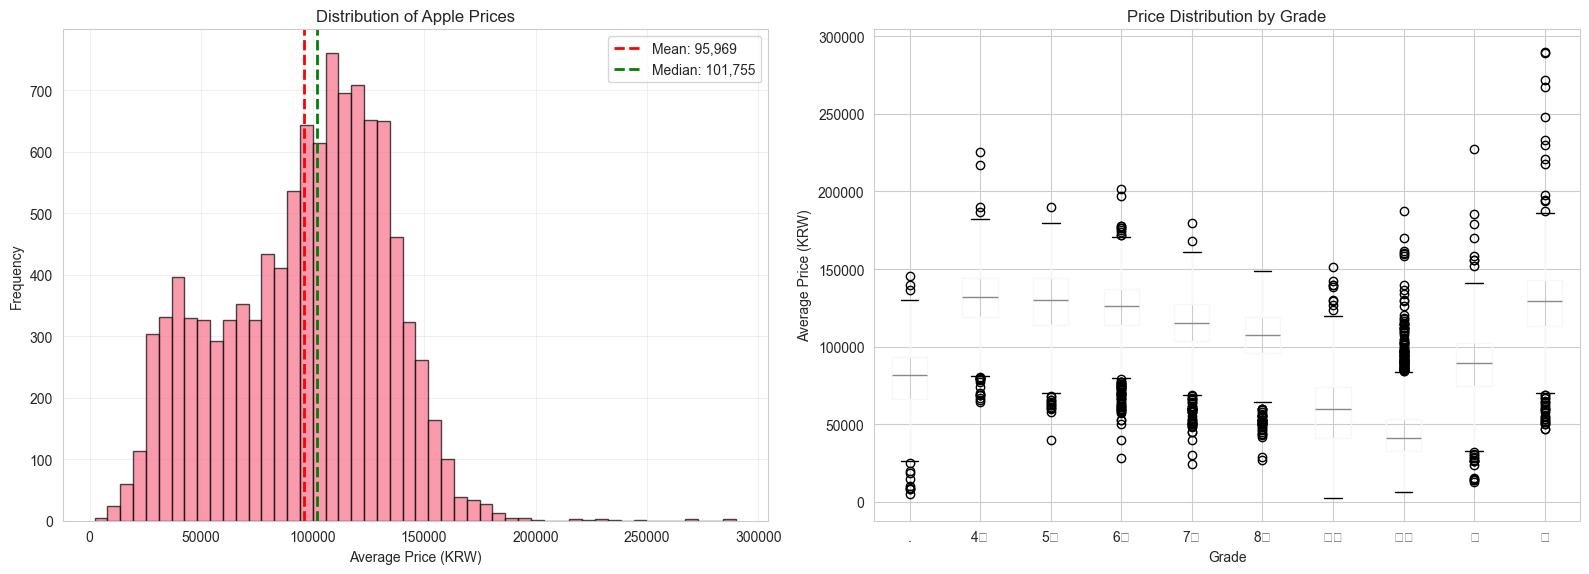

In [11]:
# 평균가격 분포 히스토그램
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 히스토그램
axes[0].hist(df_apple_price['평균가격'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(df_apple_price['평균가격'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {df_apple_price["평균가격"].mean():,.0f}')
axes[0].axvline(df_apple_price['평균가격'].median(), color='green', linestyle='--', 
                linewidth=2, label=f'Median: {df_apple_price["평균가격"].median():,.0f}')
axes[0].set_xlabel('Average Price (KRW)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Apple Prices')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 박스플롯 (등급별)
df_apple_price.boxplot(column='평균가격', by='등급', ax=axes[1])
axes[1].set_title('Price Distribution by Grade')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Average Price (KRW)')
plt.suptitle('')

plt.tight_layout()
plt.show()

## 2.7 시계열 분석

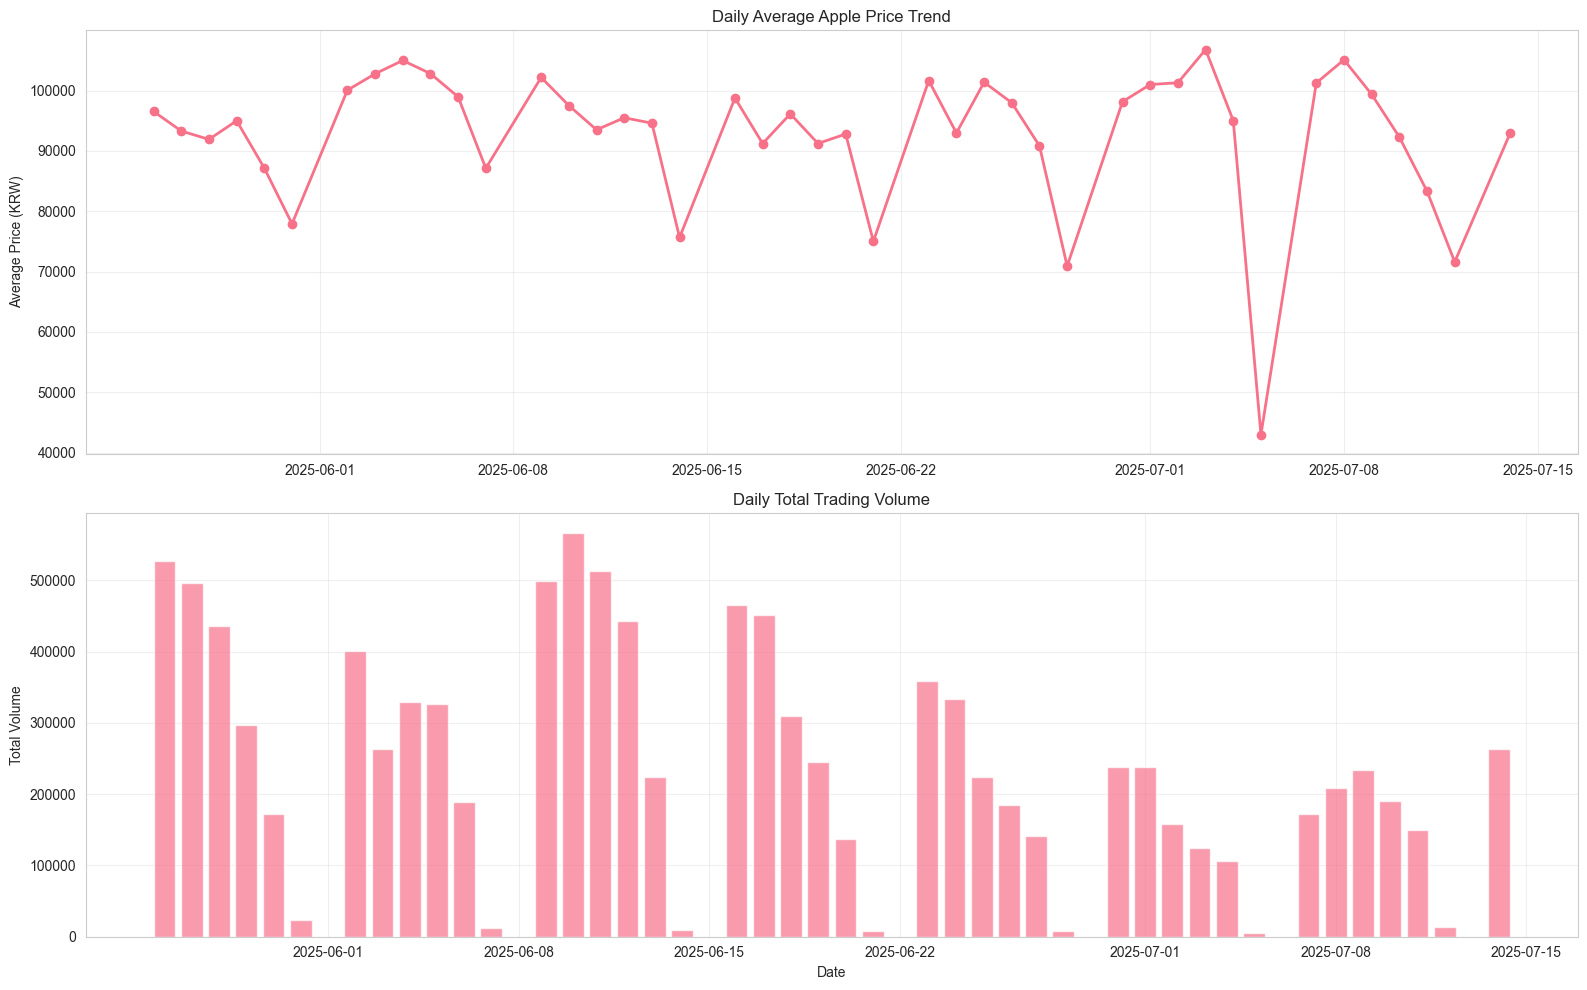

In [12]:
# 날짜별 평균 가격 추이
daily_price = df_apple_price.groupby('DATE').agg({
    '평균가격': 'mean',
    '총거래물량': 'sum'
}).reset_index()

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# 가격 추이
axes[0].plot(daily_price['DATE'], daily_price['평균가격'], marker='o', linewidth=2)
axes[0].set_ylabel('Average Price (KRW)')
axes[0].set_title('Daily Average Apple Price Trend')
axes[0].grid(True, alpha=0.3)

# 거래량 추이
axes[1].bar(daily_price['DATE'], daily_price['총거래물량'], alpha=0.7)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Total Volume')
axes[1].set_title('Daily Total Trading Volume')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 2.8 산지별 분석

산지(광역시도)별 거래 현황
            총 거래물량        총 거래금액     평균 가격
산지-광역시도                                   
경북       8251480.0  3.639292e+10   97235.0
경상북도     1289400.0  5.416666e+09   96981.0
경남        219320.0  9.455718e+08   90047.0
경상남도      196820.0  7.591800e+08  100507.0
충북        178520.0  7.216689e+08   91518.0
전북        155660.0  6.194891e+08   86976.0
강원        137800.0  6.393327e+08   96989.0
전라북도       68780.0  3.190966e+08   98038.0
강원도        63860.0  2.763138e+08   98625.0
충청북도       28760.0  1.028783e+08   88012.0


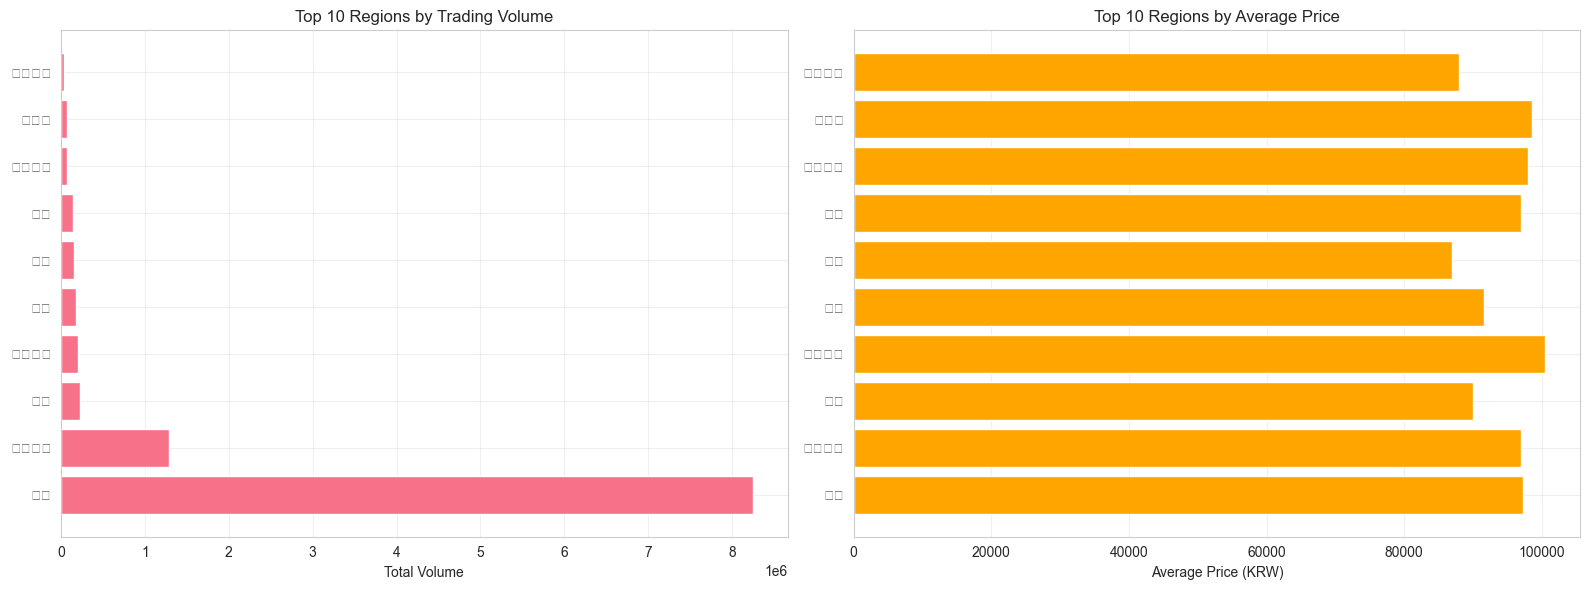

In [13]:
# 산지별 거래 현황
if '산지-광역시도' in df_apple_price.columns:
    print("=" * 80)
    print("산지(광역시도)별 거래 현황")
    print("=" * 80)
    region_stats = df_apple_price.groupby('산지-광역시도').agg({
        '총거래물량': 'sum',
        '총거래금액': 'sum',
        '평균가격': 'mean'
    }).round(0)
    region_stats.columns = ['총 거래물량', '총 거래금액', '평균 가격']
    print(region_stats.sort_values('총 거래물량', ascending=False).head(10))
    
    # 시각화
    top_regions = region_stats.sort_values('총 거래물량', ascending=False).head(10)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 거래량
    axes[0].barh(top_regions.index, top_regions['총 거래물량'])
    axes[0].set_xlabel('Total Volume')
    axes[0].set_title('Top 10 Regions by Trading Volume')
    axes[0].grid(True, alpha=0.3)
    
    # 평균 가격
    axes[1].barh(top_regions.index, top_regions['평균 가격'], color='orange')
    axes[1].set_xlabel('Average Price (KRW)')
    axes[1].set_title('Top 10 Regions by Average Price')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

---
# 3. 판매 데이터 분석

## 3.1 기본 정보

In [14]:
print("=" * 80)
print("판매 데이터 - 기본 정보")
print("=" * 80)
print(f"\n데이터 형태: {df_sales.shape}")
print(f"\n컬럼 목록:")
for col in df_sales.columns:
    print(f"  - {col}")

print("\n첫 10개 데이터:")
df_sales.head(10)

판매 데이터 - 기본 정보

데이터 형태: (17312, 8)

컬럼 목록:
  - 셀러코드
  - 수량
  - 판매상품명
  - 발주날짜
  - 업체명
  - 주문코드
  - CS여부
  - 공급가격

첫 10개 데이터:


,셀러코드,수량,판매상품명,발주날짜,업체명,주문코드,CS여부,공급가격
0,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025. 5. 26,도매GB,d136abeb-66ee-4c4a-ad60-8947935d8c61,N,"₩15,000"
1,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025. 5. 26,도매GB,9b5f4981-381c-4b36-9e11-f940bd0272da,N,"₩15,000"
2,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025. 5. 26,도매GB,b9fff397-f41d-42e7-a520-5f34f74f4a71,N,"₩15,000"
3,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025. 5. 26,도매GB,386c0970-2c67-4738-98fc-754d8818b6c0,N,"₩15,000"
4,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025. 5. 26,도매GB,a653b524-14d0-4534-8127-e20bbe98e55e,N,"₩15,000"
5,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025. 5. 26,도매GB,f13ed78c-e270-423b-8dfb-988d0568f938,N,"₩15,000"
6,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025. 5. 26,도매GB,9cebedc1-e59a-457f-b986-c4e4e5520e37,N,"₩15,000"
7,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025. 5. 26,도매GB,d648ebe4-b881-4d67-8c79-e3a39c4529b0,N,"₩15,000"
8,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025. 5. 26,도매GB,62f10bfa-3ec8-4a0c-82aa-15addb460718,N,"₩15,000"
9,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025. 5. 26,도매GB,2313b1b0-d144-4288-abe7-c261d1ed6250,N,"₩15,000"


## 3.2 데이터 전처리

In [15]:
# 발주날짜 변환
df_sales['발주날짜'] = pd.to_datetime(df_sales['발주날짜'])

# 공급가격에서 원화 기호 및 콤마 제거
df_sales['공급가격_숫자'] = df_sales['공급가격'].astype(str).str.replace('₩', '').str.replace(',', '').astype(float)

# 총 매출액 계산
df_sales['총매출액'] = df_sales['수량'] * df_sales['공급가격_숫자']

print("데이터 전처리 완료!")
df_sales.head()

데이터 전처리 완료!


,셀러코드,수량,판매상품명,발주날짜,업체명,주문코드,CS여부,공급가격,공급가격_숫자,총매출액
0,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025-05-26,도매GB,d136abeb-66ee-4c4a-ad60-8947935d8c61,N,"₩15,000",15000.0,15000.0
1,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025-05-26,도매GB,9b5f4981-381c-4b36-9e11-f940bd0272da,N,"₩15,000",15000.0,15000.0
2,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025-05-26,도매GB,b9fff397-f41d-42e7-a520-5f34f74f4a71,N,"₩15,000",15000.0,15000.0
3,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025-05-26,도매GB,386c0970-2c67-4738-98fc-754d8818b6c0,N,"₩15,000",15000.0,15000.0
4,2124,1,(행사용)(도매GB)부사쥬스용/6kg,2025-05-26,도매GB,a653b524-14d0-4534-8127-e20bbe98e55e,N,"₩15,000",15000.0,15000.0


## 3.3 기본 통계

In [16]:
print("=" * 80)
print("판매 데이터 기본 통계")
print("=" * 80)
print(f"\n총 주문 건수: {len(df_sales):,}")
print(f"총 판매 수량: {df_sales['수량'].sum():,}")
print(f"총 매출액: ₩{df_sales['총매출액'].sum():,.0f}")
print(f"평균 주문 가격: ₩{df_sales['공급가격_숫자'].mean():,.0f}")
print(f"평균 주문 수량: {df_sales['수량'].mean():.2f}")

판매 데이터 기본 통계

총 주문 건수: 17,312
총 판매 수량: 18,074
총 매출액: ₩297,031,800
평균 주문 가격: ₩15,407
평균 주문 수량: 1.04


## 3.4 결측치 분석

In [17]:
missing_sales = pd.DataFrame({
    '결측치 개수': df_sales.isnull().sum(),
    '결측치 비율(%)': (df_sales.isnull().sum() / len(df_sales) * 100).round(2)
})

print("=" * 80)
print("결측치 분석")
print("=" * 80)
print(missing_sales[missing_sales['결측치 개수'] > 0])

결측치 분석
Empty DataFrame
Columns: [결측치 개수, 결측치 비율(%)]
Index: []


## 3.5 업체별 판매 현황

In [18]:
# 업체별 통계
company_stats = df_sales.groupby('업체명').agg({
    '주문코드': 'count',
    '수량': 'sum',
    '총매출액': 'sum'
}).round(0)
company_stats.columns = ['주문 건수', '총 판매수량', '총 매출액']

print("=" * 80)
print("업체별 판매 현황")
print("=" * 80)
print(company_stats.sort_values('총 매출액', ascending=False))

업체별 판매 현황
      주문 건수  총 판매수량        총 매출액
업체명                             
도매GB  16873   17630  290088700.0
도매JI    314     316    5431000.0
경북농장     68      70     928500.0
도매BT     57      58     583600.0


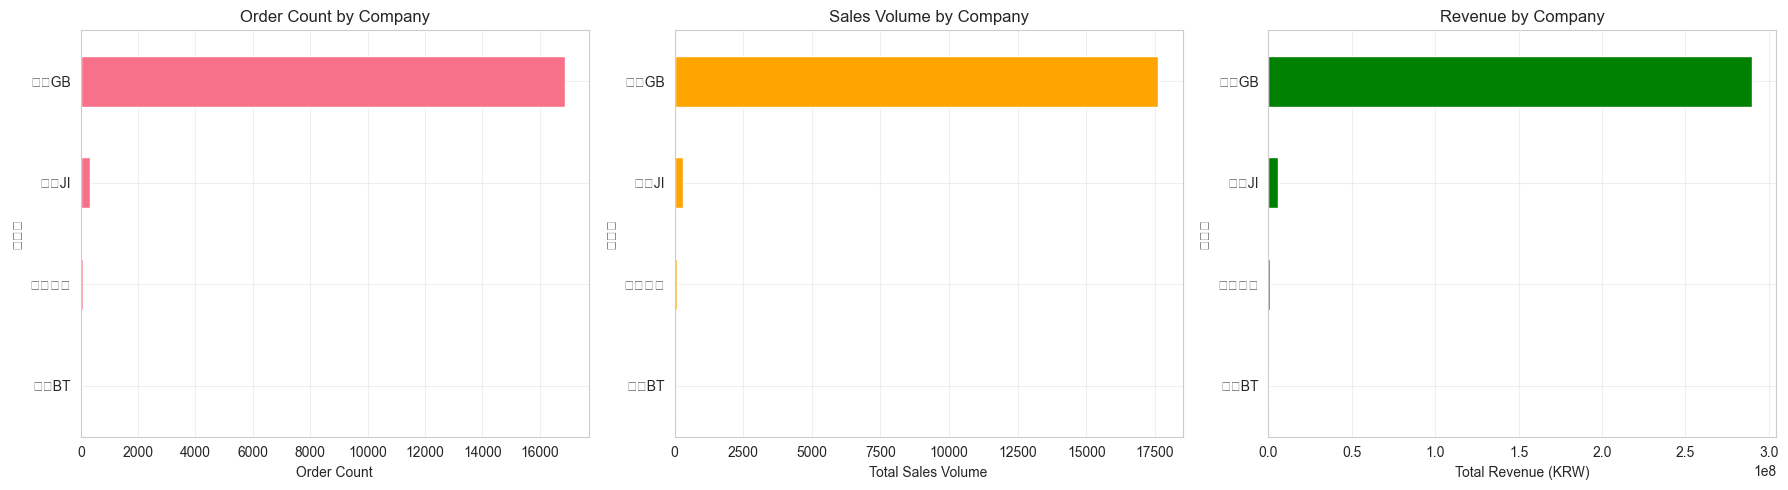

In [19]:
# 업체별 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 주문 건수
company_stats.sort_values('주문 건수', ascending=True)['주문 건수'].plot(kind='barh', ax=axes[0])
axes[0].set_xlabel('Order Count')
axes[0].set_title('Order Count by Company')
axes[0].grid(True, alpha=0.3)

# 판매 수량
company_stats.sort_values('총 판매수량', ascending=True)['총 판매수량'].plot(kind='barh', ax=axes[1], color='orange')
axes[1].set_xlabel('Total Sales Volume')
axes[1].set_title('Sales Volume by Company')
axes[1].grid(True, alpha=0.3)

# 매출액
company_stats.sort_values('총 매출액', ascending=True)['총 매출액'].plot(kind='barh', ax=axes[2], color='green')
axes[2].set_xlabel('Total Revenue (KRW)')
axes[2].set_title('Revenue by Company')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3.6 CS 여부 분석

In [20]:
# CS 여부별 통계
cs_stats = df_sales.groupby('CS여부').agg({
    '주문코드': 'count',
    '수량': 'sum',
    '총매출액': 'sum'
}).round(0)
cs_stats.columns = ['주문 건수', '총 수량', '총 매출액']

print("=" * 80)
print("CS 여부별 통계")
print("=" * 80)
print(cs_stats)

if 'Y' in cs_stats.index and 'N' in cs_stats.index:
    cs_rate = (cs_stats.loc['Y', '주문 건수'] / cs_stats['주문 건수'].sum() * 100)
    print(f"\nCS 발생률: {cs_rate:.2f}%")

CS 여부별 통계
      주문 건수   총 수량        총 매출액
CS여부                           
N     17275  18030  296078800.0
Y        37     44     953000.0

CS 발생률: 0.21%


## 3.7 상품별 판매 분석

In [21]:
# 상품별 판매 통계
product_stats = df_sales.groupby('판매상품명').agg({
    '주문코드': 'count',
    '수량': 'sum',
    '총매출액': 'sum'
}).round(0)
product_stats.columns = ['주문 건수', '총 판매수량', '총 매출액']

print("=" * 80)
print("상위 20개 인기 상품")
print("=" * 80)
print(product_stats.sort_values('주문 건수', ascending=False).head(20))

상위 20개 인기 상품
                                  주문 건수  총 판매수량       총 매출액
판매상품명                                                      
부사쥬스용/3kg                          2054    2067  18147100.0
부사쥬스용/10kg                         1958    2020  51865900.0
부사쥬스용/6kg                          1855    1868  27686500.0
(도매GB)미부사/5kg/29-31과               1766    2048  41850500.0
(행사용)(도매GB)부사쥬스용/3kg               1743    1783  16412000.0
(행사용)(도매GB)미부사/5kg/29-31과(미색못난이)   1512    1714  34240000.0
(행사용)(도매GB)부사쥬스용/6kg                905     913  13935000.0
(도매GB)미부사/3kg/10-14과                832     833  10762300.0
(도매GB)미부사/5kg/23-28과                627     707  14725500.0
(행사용)(도매GB)부사쥬스용/10kg               525     529  11921400.0
(도매GB)미부사/3kg/19-21과                412     413   4685400.0
(도매GB)미부사/5kg/12-16과                379     383   7451900.0
(도매GB)미부사/3kg/15-18과                259     262   3278000.0
(행사용)(도매GB)미부사/5kg/23-28과(미색못난이)    183     185   3213000.0
부사가정용세척/2kg/14-16과         

## 3.8 시계열 분석

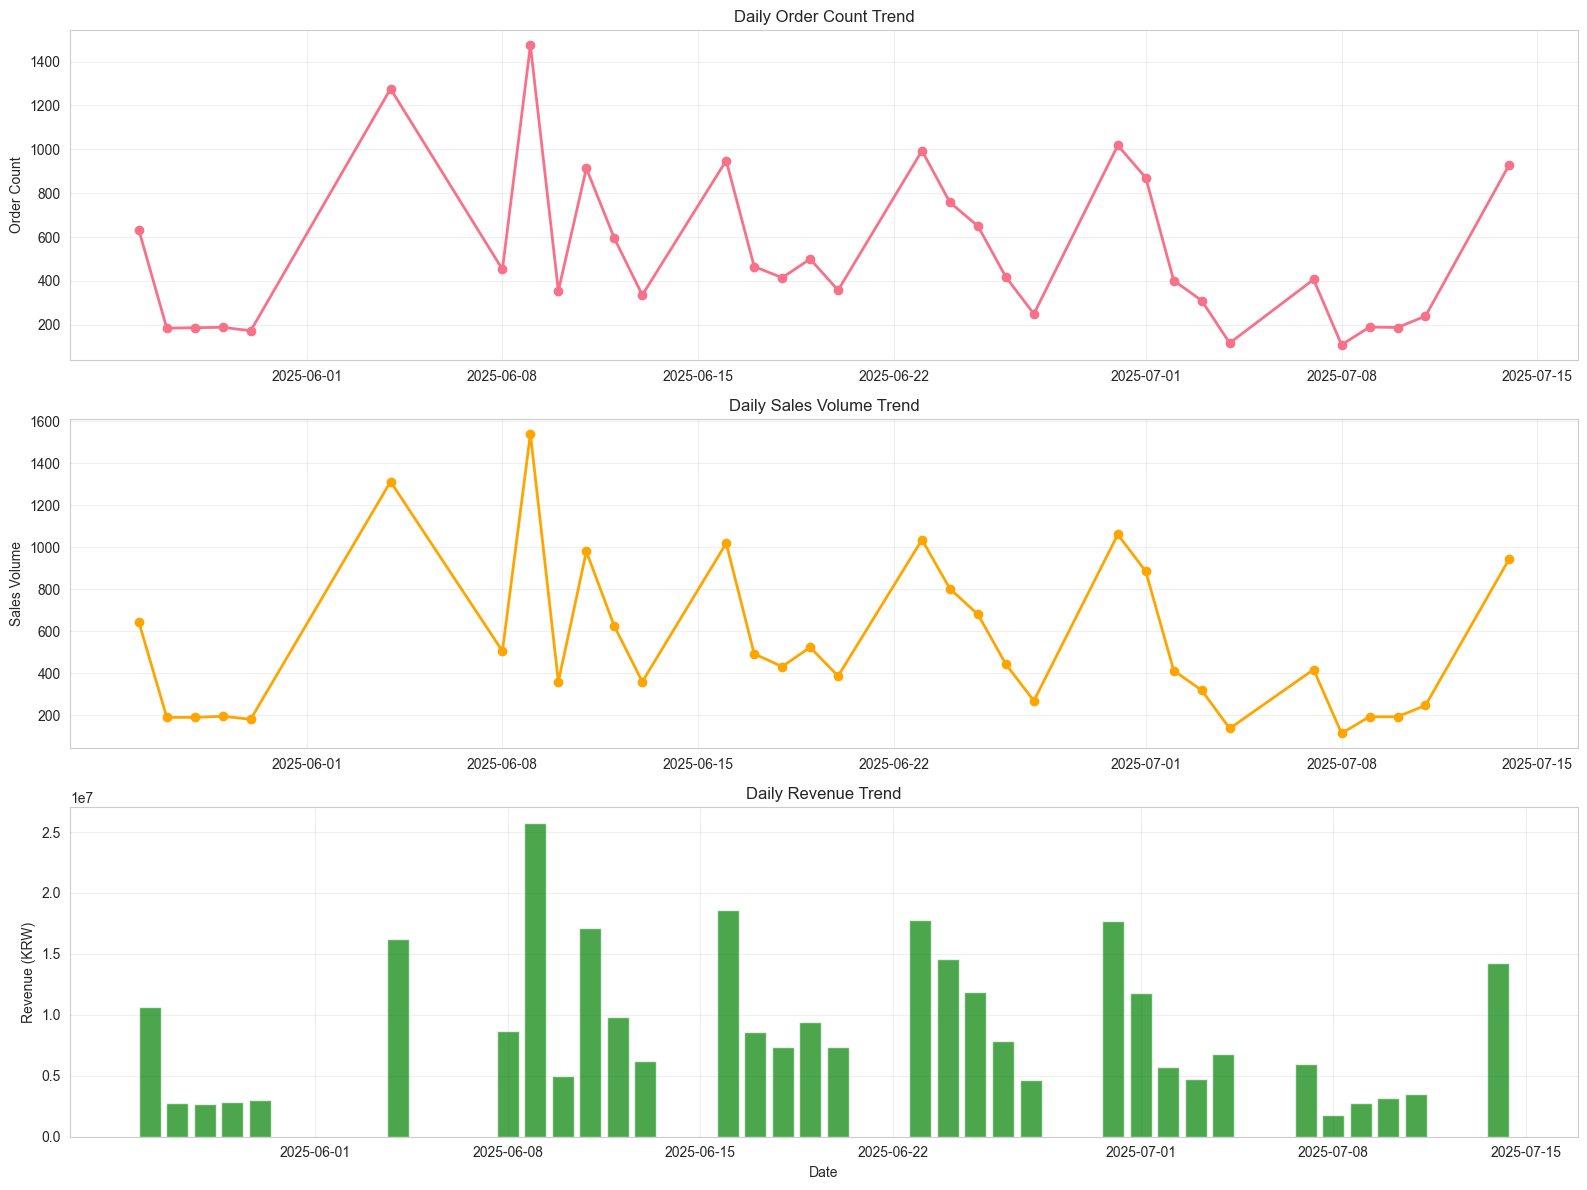

In [22]:
# 일자별 판매 추이
daily_sales = df_sales.groupby(df_sales['발주날짜'].dt.date).agg({
    '주문코드': 'count',
    '수량': 'sum',
    '총매출액': 'sum'
}).reset_index()
daily_sales.columns = ['날짜', '주문건수', '판매수량', '매출액']

fig, axes = plt.subplots(3, 1, figsize=(16, 12))

# 주문 건수
axes[0].plot(daily_sales['날짜'], daily_sales['주문건수'], marker='o', linewidth=2)
axes[0].set_ylabel('Order Count')
axes[0].set_title('Daily Order Count Trend')
axes[0].grid(True, alpha=0.3)

# 판매 수량
axes[1].plot(daily_sales['날짜'], daily_sales['판매수량'], marker='o', linewidth=2, color='orange')
axes[1].set_ylabel('Sales Volume')
axes[1].set_title('Daily Sales Volume Trend')
axes[1].grid(True, alpha=0.3)

# 매출액
axes[2].bar(daily_sales['날짜'], daily_sales['매출액'], alpha=0.7, color='green')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Revenue (KRW)')
axes[2].set_title('Daily Revenue Trend')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
# 4. 판매량 분석

## 4.1 기본 정보

In [23]:
print("=" * 80)
print("판매량 분석 데이터 - 기본 정보")
print("=" * 80)
print(f"\n데이터 형태: {df_sales_volume.shape}")
print("\n전체 데이터:")
df_sales_volume.head(20)

판매량 분석 데이터 - 기본 정보

데이터 형태: (33, 5)

전체 데이터:


,Unnamed: 0,도매GB,경북농장,도매JI,도매BT
0,2025. 5. 26,610,6,17,11
1,2025. 5. 27,167,11,6,5
2,2025. 5. 28,176,0,8,5
3,2025. 5. 29,169,1,17,7
4,2025. 5. 30,173,2,5,0
5,2025. 6. 4,1254,14,26,19
6,2025. 6. 8,505,0,0,0
7,2025. 6. 9,1431,1,104,5
8,2025. 6. 10,320,15,24,0
9,2025. 6. 11,936,6,37,1


## 4.2 데이터 전처리

In [24]:
# 첫 번째 컬럼을 날짜로 설정
date_col = df_sales_volume.columns[0]
df_sales_volume[date_col] = pd.to_datetime(df_sales_volume[date_col])
df_sales_volume = df_sales_volume.rename(columns={date_col: '날짜'})

print("데이터 전처리 완료!")
df_sales_volume.head()

데이터 전처리 완료!


,날짜,도매GB,경북농장,도매JI,도매BT
0,2025-05-26,610,6,17,11
1,2025-05-27,167,11,6,5
2,2025-05-28,176,0,8,5
3,2025-05-29,169,1,17,7
4,2025-05-30,173,2,5,0


## 4.3 업체별 총 판매량

업체별 총 판매량
도매GB    17630
도매JI      316
경북농장       70
도매BT       58
dtype: int64


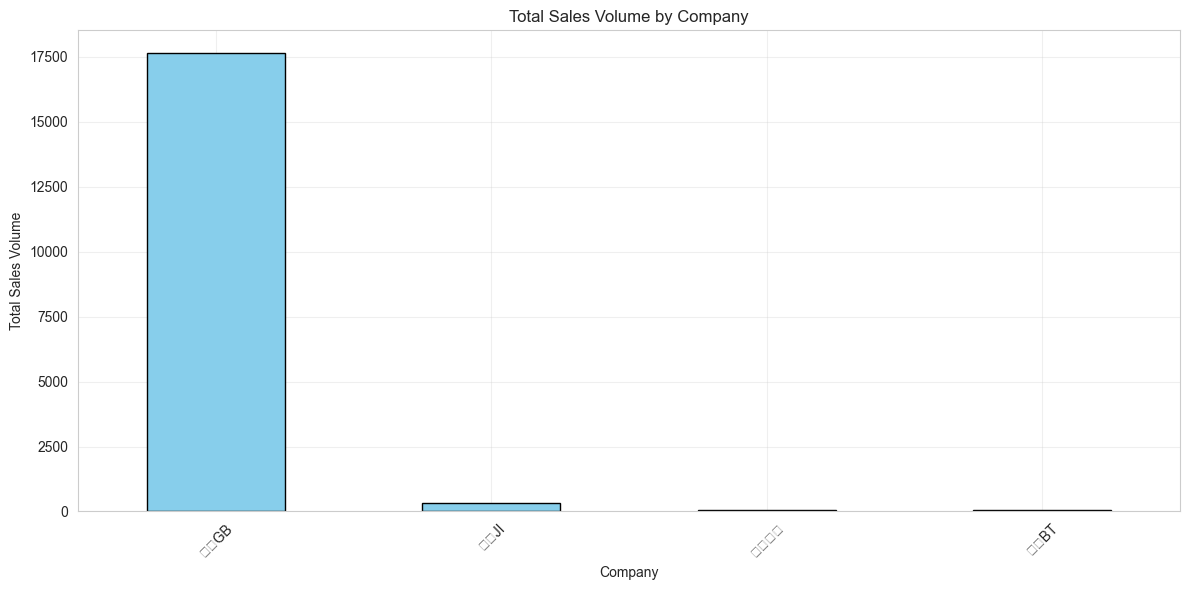

In [25]:
# 업체별 총 판매량
company_columns = [col for col in df_sales_volume.columns if col != '날짜']

total_sales_by_company = df_sales_volume[company_columns].sum().sort_values(ascending=False)

print("=" * 80)
print("업체별 총 판매량")
print("=" * 80)
print(total_sales_by_company)

# 시각화
plt.figure(figsize=(12, 6))
total_sales_by_company.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Company')
plt.ylabel('Total Sales Volume')
plt.title('Total Sales Volume by Company')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 4.4 시계열 판매량 추이

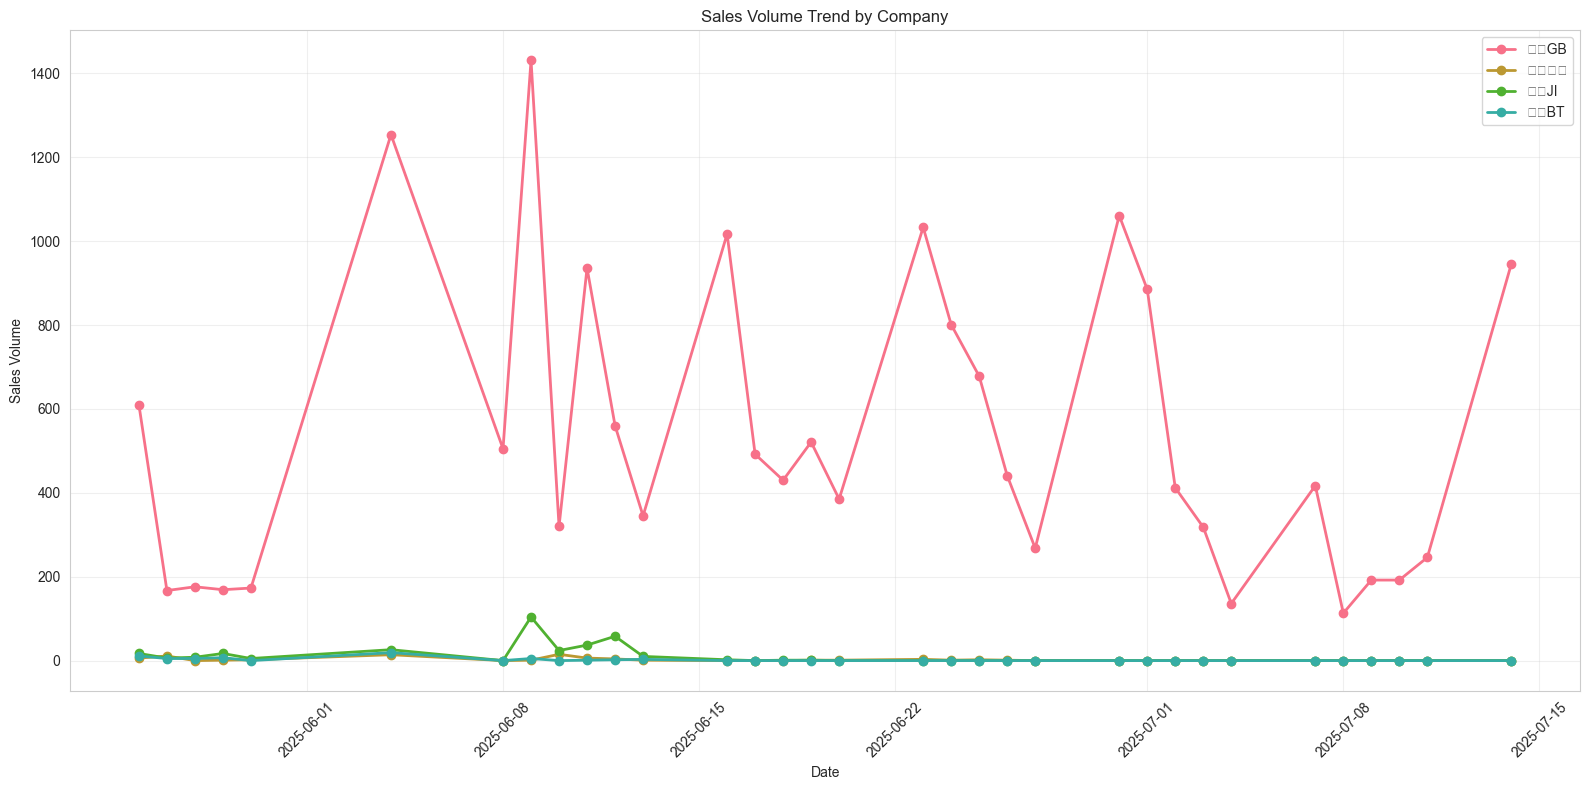

In [26]:
# 업체별 판매량 추이
plt.figure(figsize=(16, 8))

for company in company_columns:
    plt.plot(df_sales_volume['날짜'], df_sales_volume[company], 
             marker='o', label=company, linewidth=2)

plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Sales Volume Trend by Company')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4.5 기본 통계량

In [27]:
print("=" * 80)
print("업체별 판매량 통계")
print("=" * 80)
print(df_sales_volume[company_columns].describe())

업체별 판매량 통계
              도매GB       경북농장        도매JI       도매BT
count    33.000000  33.000000   33.000000  33.000000
mean    534.242424   2.121212    9.575758   1.757576
std     357.373669   3.974588   21.348346   4.023605
min     113.000000   0.000000    0.000000   0.000000
25%     246.000000   0.000000    0.000000   0.000000
50%     430.000000   0.000000    0.000000   0.000000
75%     801.000000   2.000000    8.000000   1.000000
max    1431.000000  15.000000  104.000000  19.000000


---
# 5. 출고 소요일 분석

## 5.1 기본 정보

In [28]:
print("=" * 80)
print("평균 출고 소요일 데이터")
print("=" * 80)
print(df_delivery_days)

평균 출고 소요일 데이터
    업체명  출고소요일
0  도매GB      1
1  경북농장      1
2  도매JI      2
3  도매BT      2


## 5.2 시각화

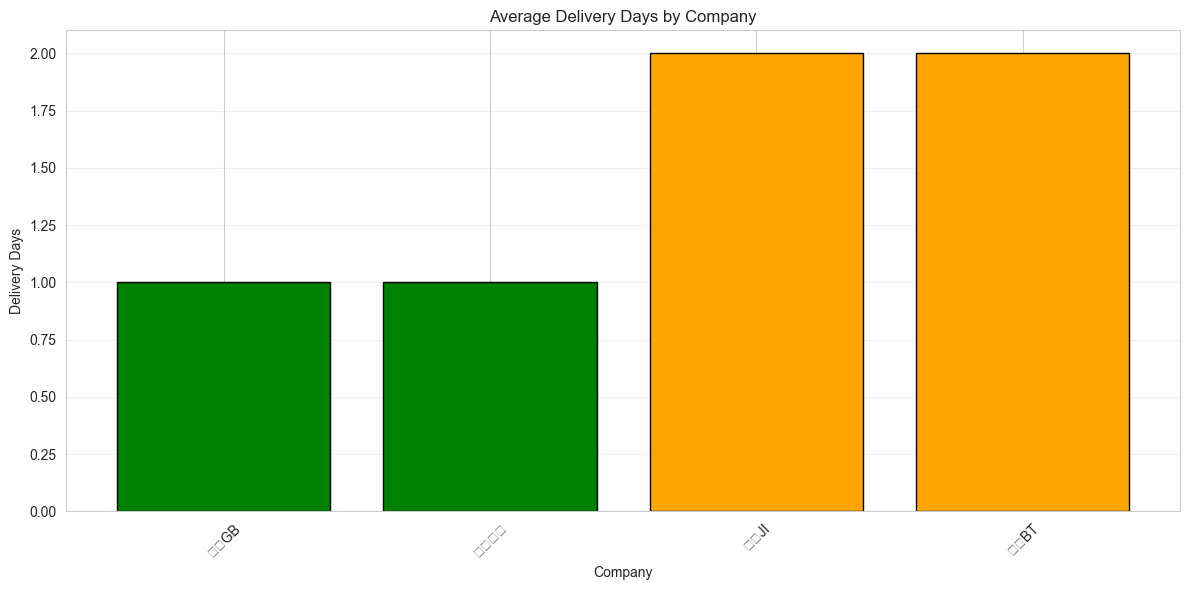


출고 속도 분석:
  - 1일 출고: ['도매GB', '경북농장']
  - 2일 출고: ['도매JI', '도매BT']


In [29]:
# 업체별 출고 소요일 비교
plt.figure(figsize=(12, 6))
plt.bar(df_delivery_days['업체명'], df_delivery_days['출고소요일'], 
        color=['green' if x == 1 else 'orange' for x in df_delivery_days['출고소요일']],
        edgecolor='black')
plt.xlabel('Company')
plt.ylabel('Delivery Days')
plt.title('Average Delivery Days by Company')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("\n출고 속도 분석:")
print(f"  - 1일 출고: {df_delivery_days[df_delivery_days['출고소요일'] == 1]['업체명'].tolist()}")
print(f"  - 2일 출고: {df_delivery_days[df_delivery_days['출고소요일'] == 2]['업체명'].tolist()}")

---
# 6. CS 데이터 분석

## 6.1 기본 정보

In [30]:
print("=" * 80)
print("CS 데이터 - 기본 정보")
print("=" * 80)
print(f"\n데이터 형태: {df_cs.shape}")
print(f"총 CS 건수: {len(df_cs)}")
print("\n첫 10개 데이터:")
df_cs.head(10)

CS 데이터 - 기본 정보

데이터 형태: (38, 21)
총 CS 건수: 38

첫 10개 데이터:


,발주번호,CS처리ID,받는사람,받는사람전화번호,매출원가,상품공급가,업체,셀러,상품명,송장번호,발주일자,희망비율,사진,CS내용,판매데이터체크,요청퍼센트,업체전달,셀러확정퍼센트,업체확정퍼센트,셀러반영,업체반영
0,b08846e0-9d20-43a9-b055-021e6f07d75a,1c0aadfa-3197-4d50-b60b-e3868fb484cc,xxx,xxx-xxx-xxx,12500,12900,도매GB,612,(행사용)(도매GB)미부사/3kg/10-14과(미색못난이),255019229872,2025-05-27 9:37:45,50,https://daebong.net/cs/1c0aadfa-3197-4d50-b60b...,.,b08846e0-9d20-43a9-b055-021e6f07d75a,10,True,10,10,True,True
1,363ad7a7-3221-4b3d-96da-788f34efafd7,3dac5234-4d74-4fcf-84e8-767bfccd2971,xxx,xxx-xxx-xxx,13000,13400,도매GB,612,(행사용)(도매GB)미부사/3kg/6-9과(미색못난이),255019188933,2025-05-26 9:54:06,50,https://daebong.net/cs/3dac5234-4d74-4fcf-84e8...,.,363ad7a7-3221-4b3d-96da-788f34efafd7,10,True,10,10,True,True
2,70ae509a-b32a-4968-9199-8cce0d1e5853,7e1ed74b-f548-4b3c-a23c-389389a74cdf,xxx,xxx-xxx-xxx,13000,13400,도매GB,612,(행사용)(도매GB)미부사/3kg/6-9과(미색못난이),255019294456,2025-05-29 9:48:50,70,https://daebong.net/cs/7e1ed74b-f548-4b3c-a23c...,썩음,70ae509a-b32a-4968-9199-8cce0d1e5853,25,True,25,25,True,True
3,8843067a-b2a7-4edb-873d-995844587173,03fa7b74-e017-4eab-94fa-252d1095d25b,xxx,xxx-xxx-xxx,8500,8800,도매GB,2064,(행사용)(도매GB)부사쥬스용/3kg,255019409820,2025-06-04 9:41:45,100,https://daebong.net/cs/03fa7b74-e017-4eab-94fa...,고객 반품처리,8843067a-b2a7-4edb-873d-995844587173,100,True,100,100,True,True
4,8c5a6b0a-9415-4cf7-870d-a3b322610a19,b19c8e62-4524-4b3b-ac9a-097e1f180491,xxx,xxx-xxx-xxx,15500,16000,도매GB,2124,(행사용)(도매GB)미부사/5kg/29-31과(미색못난이),255019524712,2025-06-09 9:56:07,100,https://daebong.net/cs/b19c8e62-4524-4b3b-ac9a...,상품이 물에 젖어와서 먹을수 없습니다.,8c5a6b0a-9415-4cf7-870d-a3b322610a19,100,True,100,0,True,True
5,af1339e4-2faa-4761-97c4-0b9eb329cff7,890d74fc-9cb8-4345-9ddc-2d7f73050272,xxx,xxx-xxx-xxx,17000,17600,도매GB,2124,(행사용)(도매GB)부사쥬스용/3kg,255019416050,2025-06-04 9:41:45,50,https://daebong.net/cs/890d74fc-9cb8-4345-9ddc...,회수만 요청드립니다.,af1339e4-2faa-4761-97c4-0b9eb329cff7,0,True,0,0,True,True
6,15eb6bb0-95dd-46cd-8919-59dbb7e73745,b9ea9ed9-324b-4620-9a43-a7333558f6e1,xxx,xxx-xxx-xxx,21500,22200,도매GB,2124,(행사용)(도매GB)부사쥬스용/10kg,255290941555,2025-06-11 15:15:19,100,https://daebong.net/cs/b9ea9ed9-324b-4620-9a43...,"강성 회수요청, 회수바랍니다.",15eb6bb0-95dd-46cd-8919-59dbb7e73745,100,True,100,100,True,True
7,22015ae4-dde1-445b-ac3b-6940f4f4a78b,78be6911-0d3c-4a77-b633-a133139f3373,xxx,xxx-xxx-xxx,31000,32000,도매GB,2124,(행사용)(도매GB)미부사/5kg/29-31과(미색못난이),255290936736,2025-06-11 15:15:19,1,https://daebong.net/cs/78be6911-0d3c-4a77-b633...,추가회수만 부탁드리겠습니다. 주문상품이 10k인데. 저희가 미부사 5k 2개를 ...,22015ae4-dde1-445b-ac3b-6940f4f4a78b,0,True,0,0,True,True
8,251bc09d-0305-451e-8125-4c58f2433374,745c0cda-289f-451b-983d-985b4258143c,xxx,xxx-xxx-xxx,12500,12900,도매GB,612,(행사용)(도매GB)미부사/3kg/10-14과(미색못난이),255291027460,2025-06-16 9:41:57,50,https://daebong.net/cs/745c0cda-289f-451b-983d...,파먹은 흔적,251bc09d-0305-451e-8125-4c58f2433374,10,True,10,10,True,True
9,649f70cf-5ffd-4182-8d13-0b167c733c29,77ee7a00-e88c-48e0-81d4-3327f27d4ee0,xxx,xxx-xxx-xxx,15500,16000,도매GB,2124,(행사용)(도매GB)미부사/5kg/29-31과(미색못난이),255290936950,2025-06-11 15:15:19,1,https://daebong.net/cs/77ee7a00-e88c-48e0-81d4...,"저희가 환불은 드렸는데, 회수만 요청드리겠습니다. 강성입니다. 히수해 해주시면...",649f70cf-5ffd-4182-8d13-0b167c733c29,0,True,0,0,True,True


## 6.2 데이터 전처리

In [31]:
# 발주일자 변환
df_cs['발주일자'] = pd.to_datetime(df_cs['발주일자'])

# 퍼센트 관련 컬럼 숫자로 변환
percent_cols = ['희망비율', '요청퍼센트', '셀러확정퍼센트', '업체확정퍼센트']
for col in percent_cols:
    if col in df_cs.columns:
        df_cs[col] = pd.to_numeric(df_cs[col], errors='coerce')

print("데이터 전처리 완료!")

데이터 전처리 완료!


## 6.3 업체별 CS 현황

업체별 CS 건수
업체
도매GB    37
도매JI     1
Name: count, dtype: int64


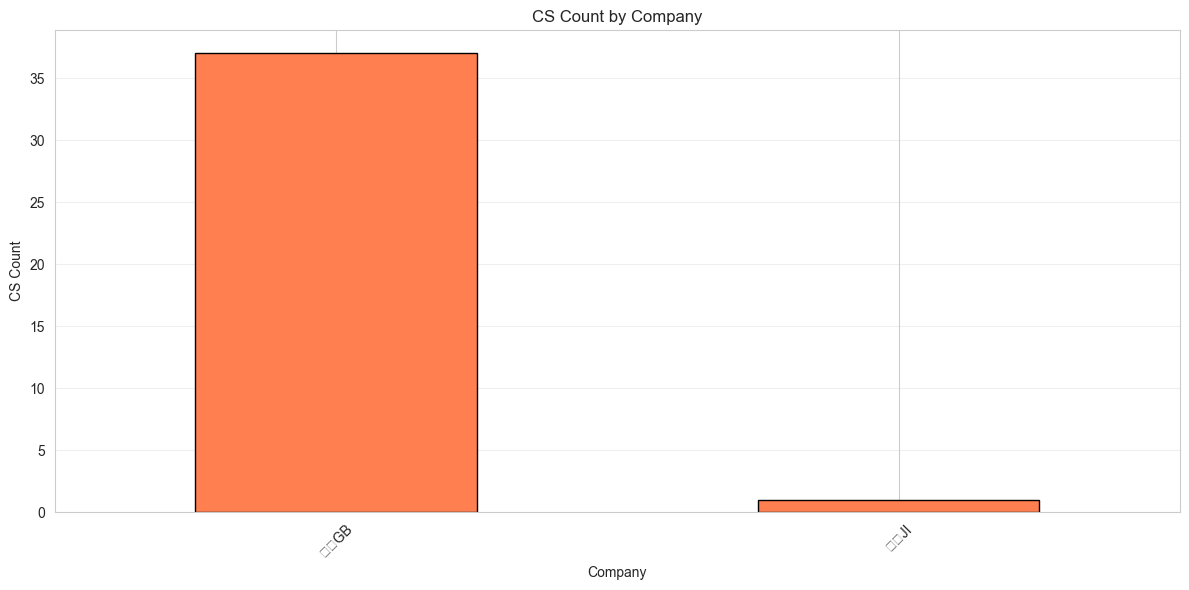

In [32]:
# 업체별 CS 건수
cs_by_company = df_cs['업체'].value_counts()

print("=" * 80)
print("업체별 CS 건수")
print("=" * 80)
print(cs_by_company)

# 시각화
plt.figure(figsize=(12, 6))
cs_by_company.plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('Company')
plt.ylabel('CS Count')
plt.title('CS Count by Company')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 6.4 셀러별 CS 현황

In [33]:
# 셀러별 CS 건수
cs_by_seller = df_cs['셀러'].value_counts().head(10)

print("=" * 80)
print("상위 10개 셀러별 CS 건수")
print("=" * 80)
print(cs_by_seller)

상위 10개 셀러별 CS 건수
셀러
612     18
2124    12
1914     3
2064     1
2250     1
2249     1
3360     1
1984     1
Name: count, dtype: int64


## 6.5 CS 내용 분석

In [34]:
# CS 내용 워드 분석 (간단한 키워드 빈도)
print("=" * 80)
print("CS 내용 샘플 (상위 10개)")
print("=" * 80)
for idx, content in enumerate(df_cs['CS내용'].head(10), 1):
    print(f"{idx}. {content[:100]}..." if len(str(content)) > 100 else f"{idx}. {content}")

CS 내용 샘플 (상위 10개)
1. .
2. .
3. 썩음
4. 고객 반품처리
5. 상품이 물에 젖어와서  먹을수 없습니다.
6. 회수만 요청드립니다.  
7. 강성 회수요청, 회수바랍니다. 
8. 추가회수만 부탁드리겠습니다.  주문상품이 10k인데.  저희가 미부사 5k 2개를 보내는데  1개만 회수해 갖다고 나머지도 회수해달라고 하니 부탁드리겠습니다.  
9.  파먹은 흔적
10. 저희가 환불은 드렸는데,  회수만 요청드리겠습니다.  강성입니다.  히수해 해주시면 아무문제 없습니다.


## 6.6 환불 비율 분석

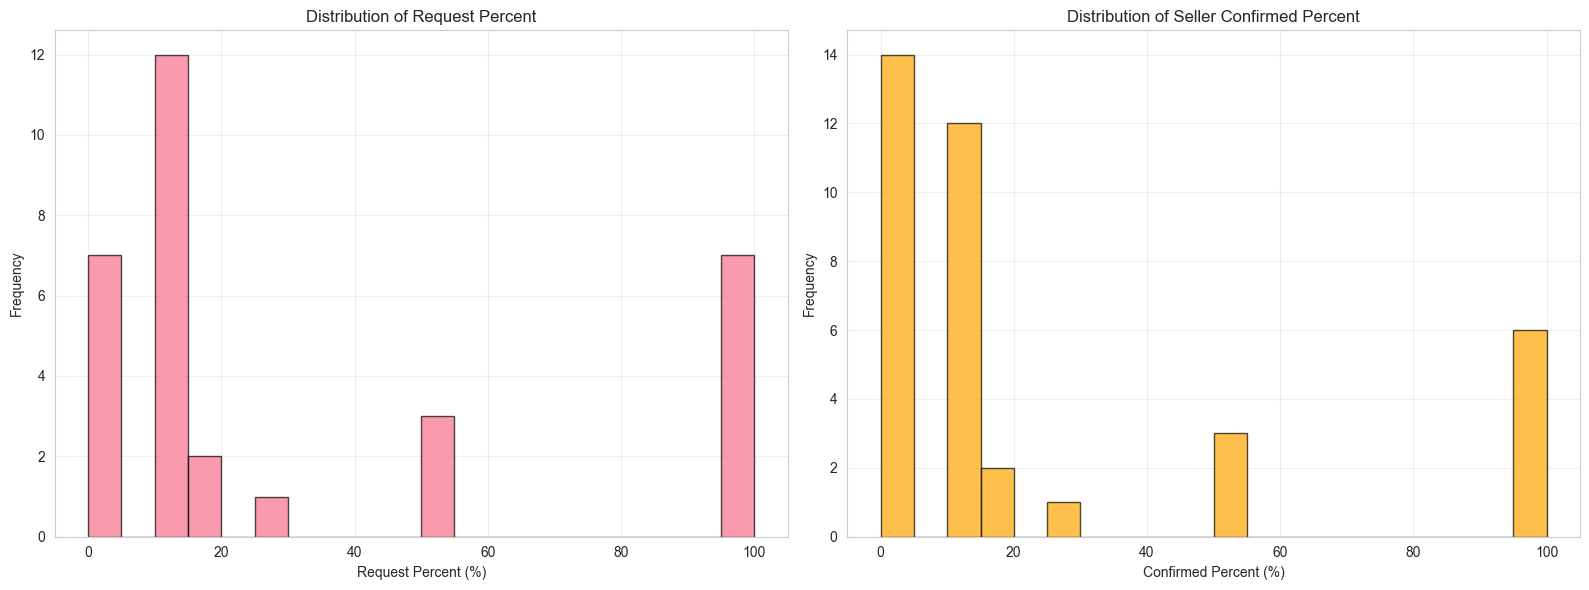


환불 비율 통계:
  평균 요청 퍼센트: 32.03%
  평균 확정 퍼센트: 24.34%


In [35]:
# 요청 퍼센트 분포
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 히스토그램
axes[0].hist(df_cs['요청퍼센트'].dropna(), bins=20, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Request Percent (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Request Percent')
axes[0].grid(True, alpha=0.3)

# 확정 퍼센트 분포
axes[1].hist(df_cs['셀러확정퍼센트'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Confirmed Percent (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Seller Confirmed Percent')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n환불 비율 통계:")
print(f"  평균 요청 퍼센트: {df_cs['요청퍼센트'].mean():.2f}%")
print(f"  평균 확정 퍼센트: {df_cs['셀러확정퍼센트'].mean():.2f}%")

## 6.7 시계열 CS 추이

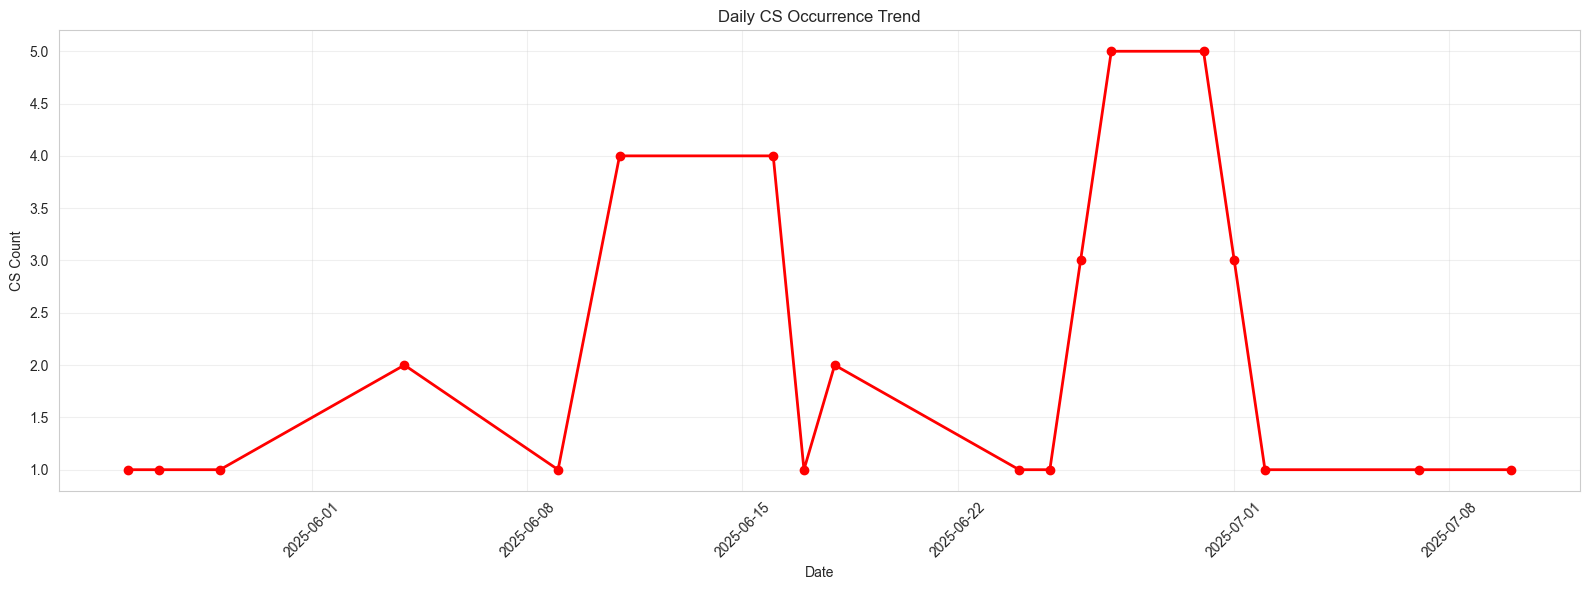

In [36]:
# 일자별 CS 발생 추이
cs_daily = df_cs.groupby(df_cs['발주일자'].dt.date).size().reset_index()
cs_daily.columns = ['날짜', 'CS 건수']

plt.figure(figsize=(16, 6))
plt.plot(cs_daily['날짜'], cs_daily['CS 건수'], marker='o', linewidth=2, color='red')
plt.xlabel('Date')
plt.ylabel('CS Count')
plt.title('Daily CS Occurrence Trend')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

---
# 7. CS 비율 분석

## 7.1 기본 정보

In [37]:
print("=" * 80)
print("CS 비율 분석 데이터 - 기본 정보")
print("=" * 80)
print(f"\n데이터 형태: {df_cs_ratio.shape}")
print("\n전체 데이터:")
df_cs_ratio.head(20)

CS 비율 분석 데이터 - 기본 정보

데이터 형태: (33, 5)

전체 데이터:


,Unnamed: 0,도매GB,경북농장,도매JI,도매BT
0,2025. 5. 26,0.16%,0.00%,0.00%,0.00%
1,2025. 5. 27,0.60%,0.00%,0.00%,0.00%
2,2025. 5. 28,0.00%,NaN,0.00%,0.00%
3,2025. 5. 29,0.59%,0.00%,0.00%,0.00%
4,2025. 5. 30,0.00%,0.00%,0.00%,NaN
5,2025. 6. 4,0.16%,0.00%,0.00%,0.00%
6,2025. 6. 8,0.00%,NaN,NaN,NaN
7,2025. 6. 9,0.07%,0.00%,0.00%,0.00%
8,2025. 6. 10,0.00%,0.00%,0.00%,NaN
9,2025. 6. 11,0.43%,0.00%,0.00%,0.00%


## 7.2 데이터 전처리

In [38]:
# 첫 번째 컬럼을 날짜로 설정
date_col = df_cs_ratio.columns[0]
df_cs_ratio[date_col] = pd.to_datetime(df_cs_ratio[date_col])
df_cs_ratio = df_cs_ratio.rename(columns={date_col: '날짜'})

# 퍼센트 기호 제거 및 숫자 변환
cs_company_columns = [col for col in df_cs_ratio.columns if col != '날짜']
for col in cs_company_columns:
    df_cs_ratio[col] = df_cs_ratio[col].astype(str).str.replace('%', '').replace('', np.nan)
    df_cs_ratio[col] = pd.to_numeric(df_cs_ratio[col], errors='coerce')

print("데이터 전처리 완료!")
df_cs_ratio.head()

데이터 전처리 완료!


,날짜,도매GB,경북농장,도매JI,도매BT
0,2025-05-26,0.16,0.0,0.0,0.0
1,2025-05-27,0.60,0.0,0.0,0.0
2,2025-05-28,0.00,NaN,0.0,0.0
3,2025-05-29,0.59,0.0,0.0,0.0
4,2025-05-30,0.00,0.0,0.0,NaN


## 7.3 업체별 평균 CS 비율

업체별 평균 CS 비율
  도매JI: 7.1429%
  도매GB: 0.2191%
  경북농장: 0.0000%
  도매BT: 0.0000%


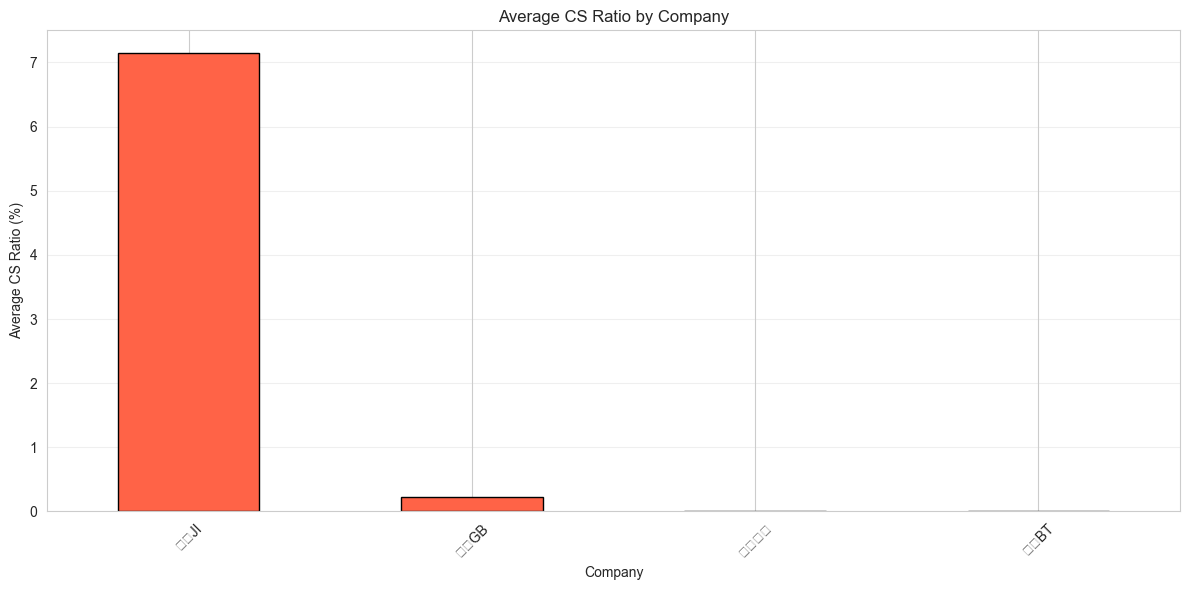

In [39]:
# 업체별 평균 CS 비율
avg_cs_ratio = df_cs_ratio[cs_company_columns].mean().sort_values(ascending=False)

print("=" * 80)
print("업체별 평균 CS 비율")
print("=" * 80)
for company, ratio in avg_cs_ratio.items():
    print(f"  {company}: {ratio:.4f}%")

# 시각화
plt.figure(figsize=(12, 6))
avg_cs_ratio.plot(kind='bar', color='tomato', edgecolor='black')
plt.xlabel('Company')
plt.ylabel('Average CS Ratio (%)')
plt.title('Average CS Ratio by Company')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 7.4 시계열 CS 비율 추이

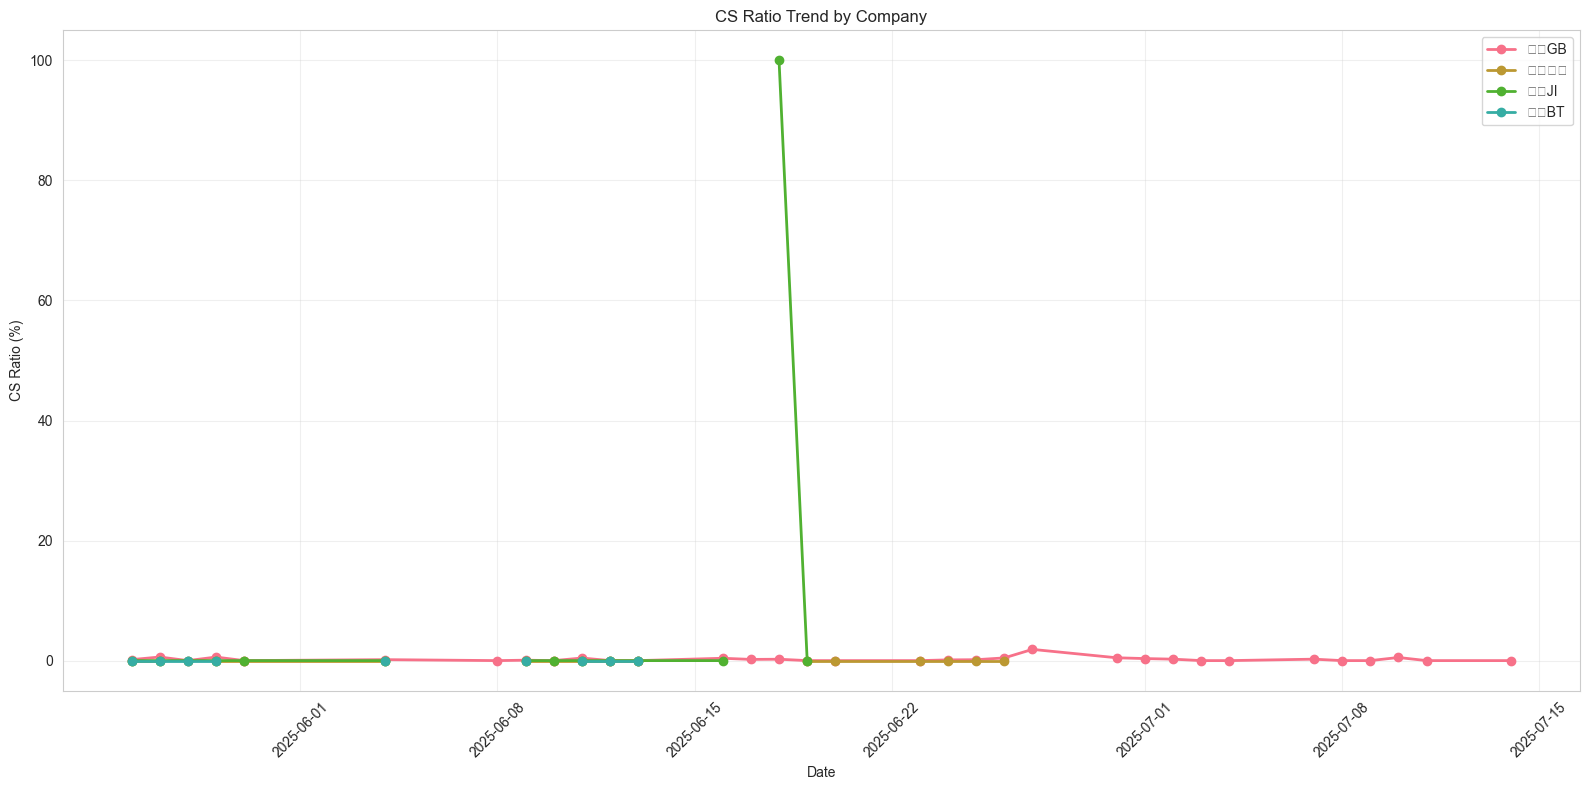

In [40]:
# 업체별 CS 비율 추이
plt.figure(figsize=(16, 8))

for company in cs_company_columns:
    plt.plot(df_cs_ratio['날짜'], df_cs_ratio[company], 
             marker='o', label=company, linewidth=2)

plt.xlabel('Date')
plt.ylabel('CS Ratio (%)')
plt.title('CS Ratio Trend by Company')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7.5 CS 비율 통계

In [41]:
print("=" * 80)
print("업체별 CS 비율 통계")
print("=" * 80)
print(df_cs_ratio[cs_company_columns].describe())

업체별 CS 비율 통계
            도매GB  경북농장        도매JI  도매BT
count  33.000000  16.0   14.000000   9.0
mean    0.219091   0.0    7.142857   0.0
std     0.356567   0.0   26.726124   0.0
min     0.000000   0.0    0.000000   0.0
25%     0.000000   0.0    0.000000   0.0
50%     0.120000   0.0    0.000000   0.0
75%     0.340000   0.0    0.000000   0.0
max     1.870000   0.0  100.000000   0.0


---
# 8. 통합 인사이트 및 결론

## 8.1 주요 발견사항 요약

In [42]:
print("=" * 80)
print("데이터 분석 종합 요약")
print("=" * 80)

print("\n1. 농넷 시장별 사과가격")
print(f"   - 총 거래 레코드: {len(df_apple_price):,}")
print(f"   - 평균 가격: ₩{df_apple_price['평균가격'].mean():,.0f}")
print(f"   - 가격 범위: ₩{df_apple_price['평균가격'].min():,.0f} ~ ₩{df_apple_price['평균가격'].max():,.0f}")

print("\n2. 판매 데이터")
print(f"   - 총 주문 건수: {len(df_sales):,}")
print(f"   - 총 매출액: ₩{df_sales['총매출액'].sum():,.0f}")
print(f"   - 평균 주문 가격: ₩{df_sales['공급가격_숫자'].mean():,.0f}")

print("\n3. 판매량 분석")
print(f"   - 분석 기간: {df_sales_volume['날짜'].min().date()} ~ {df_sales_volume['날짜'].max().date()}")
print(f"   - 일평균 판매량: {df_sales_volume[company_columns].sum(axis=1).mean():.0f}")

print("\n4. 출고 소요일")
print(f"   - 평균 출고 소요일: {df_delivery_days['출고소요일'].mean():.1f}일")
print(f"   - 최단 출고: {df_delivery_days['출고소요일'].min()}일")
print(f"   - 최장 출고: {df_delivery_days['출고소요일'].max()}일")

print("\n5. CS 데이터")
print(f"   - 총 CS 건수: {len(df_cs)}")
print(f"   - 평균 환불 요청 비율: {df_cs['요청퍼센트'].mean():.2f}%")
print(f"   - 평균 확정 비율: {df_cs['셀러확정퍼센트'].mean():.2f}%")

print("\n6. CS 비율")
print(f"   - 전체 평균 CS 비율: {df_cs_ratio[cs_company_columns].mean().mean():.4f}%")
print(f"   - 최고 CS 비율 업체: {avg_cs_ratio.idxmax()} ({avg_cs_ratio.max():.4f}%)")
print(f"   - 최저 CS 비율 업체: {avg_cs_ratio.idxmin()} ({avg_cs_ratio.min():.4f}%)")

데이터 분석 종합 요약

1. 농넷 시장별 사과가격
   - 총 거래 레코드: 10,736
   - 평균 가격: ₩95,969
   - 가격 범위: ₩2,200 ~ ₩290,000

2. 판매 데이터
   - 총 주문 건수: 17,312
   - 총 매출액: ₩297,031,800
   - 평균 주문 가격: ₩15,407

3. 판매량 분석
   - 분석 기간: 2025-05-26 ~ 2025-07-14
   - 일평균 판매량: 548

4. 출고 소요일
   - 평균 출고 소요일: 1.5일
   - 최단 출고: 1일
   - 최장 출고: 2일

5. CS 데이터
   - 총 CS 건수: 38
   - 평균 환불 요청 비율: 32.03%
   - 평균 확정 비율: 24.34%

6. CS 비율
   - 전체 평균 CS 비율: 1.8405%
   - 최고 CS 비율 업체: 도매JI (7.1429%)
   - 최저 CS 비율 업체: 경북농장 (0.0000%)


## 8.2 상관관계 분석 (판매량 vs CS 비율)

In [43]:
# 날짜 기준으로 판매량과 CS 비율 병합
merged_data = pd.merge(
    df_sales_volume.set_index('날짜'),
    df_cs_ratio.set_index('날짜'),
    left_index=True,
    right_index=True,
    suffixes=('_sales', '_cs')
)

# 각 업체별 판매량과 CS 비율 상관관계
print("=" * 80)
print("업체별 판매량 vs CS 비율 상관계수")
print("=" * 80)

for company in company_columns:
    if f'{company}_sales' in merged_data.columns and f'{company}_cs' in merged_data.columns:
        corr = merged_data[f'{company}_sales'].corr(merged_data[f'{company}_cs'])
        print(f"  {company}: {corr:.4f}")

업체별 판매량 vs CS 비율 상관계수
  도매GB: -0.0667
  경북농장: nan
  도매JI: -0.2187
  도매BT: nan


## 8.3 기계학습을 위한 권장사항

In [44]:
print("=" * 80)
print("기계학습 모델링을 위한 권장사항")
print("=" * 80)

print("\n1. 데이터 전처리")
print("   - 날짜 데이터를 활용한 시계열 특성 생성 (요일, 주차, 월 등)")
print("   - 결측치 처리: 평균/중앙값 대체 또는 보간법 적용")
print("   - 범주형 변수 인코딩 (업체명, 상품명, 등급 등)")

print("\n2. 특성 엔지니어링")
print("   - 판매량 이동평균 (7일, 14일, 30일)")
print("   - 가격 변동률 계산")
print("   - 업체별 과거 CS 비율 누적 특성")
print("   - 출고 소요일을 고려한 배송 효율성 지표")

print("\n3. 예측 모델 제안")
print("   - 판매량 예측: 시계열 모델 (ARIMA, LSTM)")
print("   - CS 발생 예측: 분류 모델 (Random Forest, XGBoost)")
print("   - 가격 예측: 회귀 모델 (Linear Regression, Ridge, Lasso)")

print("\n4. 평가 지표")
print("   - 판매량 예측: MAE, RMSE, MAPE")
print("   - CS 발생 예측: Precision, Recall, F1-Score, AUC")
print("   - 가격 예측: R², MAE, RMSE")

print("\n5. 주의사항")
print("   - 데이터 불균형 문제 (CS 발생 건수가 적음) → SMOTE 등 적용 고려")
print("   - 계절성/추세 고려 (시계열 데이터)")
print("   - 외부 요인 (날씨, 공휴일 등) 추가 고려")

기계학습 모델링을 위한 권장사항

1. 데이터 전처리
   - 날짜 데이터를 활용한 시계열 특성 생성 (요일, 주차, 월 등)
   - 결측치 처리: 평균/중앙값 대체 또는 보간법 적용
   - 범주형 변수 인코딩 (업체명, 상품명, 등급 등)

2. 특성 엔지니어링
   - 판매량 이동평균 (7일, 14일, 30일)
   - 가격 변동률 계산
   - 업체별 과거 CS 비율 누적 특성
   - 출고 소요일을 고려한 배송 효율성 지표

3. 예측 모델 제안
   - 판매량 예측: 시계열 모델 (ARIMA, LSTM)
   - CS 발생 예측: 분류 모델 (Random Forest, XGBoost)
   - 가격 예측: 회귀 모델 (Linear Regression, Ridge, Lasso)

4. 평가 지표
   - 판매량 예측: MAE, RMSE, MAPE
   - CS 발생 예측: Precision, Recall, F1-Score, AUC
   - 가격 예측: R², MAE, RMSE

5. 주의사항
   - 데이터 불균형 문제 (CS 발생 건수가 적음) → SMOTE 등 적용 고려
   - 계절성/추세 고려 (시계열 데이터)
   - 외부 요인 (날씨, 공휴일 등) 추가 고려


## 8.4 데이터 품질 체크리스트

In [45]:
print("=" * 80)
print("데이터 품질 체크리스트")
print("=" * 80)

datasets = {
    '농넷_시장별_사과가격': df_apple_price,
    '판매데이터': df_sales,
    '판매량분석': df_sales_volume,
    '평균출고소요일': df_delivery_days,
    'CS데이터': df_cs,
    'CS비율분석': df_cs_ratio
}

for name, df in datasets.items():
    print(f"\n{name}:")
    print(f"  - 총 레코드 수: {len(df):,}")
    print(f"  - 컬럼 수: {len(df.columns)}")
    print(f"  - 결측치 비율: {(df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100):.2f}%")
    print(f"  - 중복 행: {df.duplicated().sum():,}")

print("\n" + "=" * 80)
print("분석 완료!")
print("=" * 80)

데이터 품질 체크리스트

농넷_시장별_사과가격:
  - 총 레코드 수: 10,736
  - 컬럼 수: 12
  - 결측치 비율: 0.00%
  - 중복 행: 0

판매데이터:
  - 총 레코드 수: 17,312
  - 컬럼 수: 10
  - 결측치 비율: 0.00%
  - 중복 행: 0

판매량분석:
  - 총 레코드 수: 33
  - 컬럼 수: 5
  - 결측치 비율: 0.00%
  - 중복 행: 0

평균출고소요일:
  - 총 레코드 수: 4
  - 컬럼 수: 2
  - 결측치 비율: 0.00%
  - 중복 행: 0

CS데이터:
  - 총 레코드 수: 38
  - 컬럼 수: 21
  - 결측치 비율: 0.75%
  - 중복 행: 0

CS비율분석:
  - 총 레코드 수: 33
  - 컬럼 수: 5
  - 결측치 비율: 36.36%
  - 중복 행: 0

분석 완료!
